# Exercise 2: Applying acute on batch datasets

**Author**: John Hodge

In the previous exercise we learned how to use some basic tools latent to PlantCV to explore color spaces and extract plant shapes from an image then use this shape data for generating pseudo-landmarks (plms) with `acute` while thinking a bit about how `acute` is making its calls for de novo landmarks.  While this is useful and necessary we also need to think about how best to scale up our code in order to be used on batch datasets which can consist of multiple images either of the same genotype or of comparable stages of different genotypes.  For the sake of this demonstration we'll design a loop to run `acute` on a time series from the dataset we began to explore in the previous exercise.  With that all being said lets get started by taking a look at the files we have on hand...


In [1]:
%matplotlib inline
# Change inline to widget for interactive plots
from plantcv import plantcv as pcv
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
# PlantCV adjustable global parameters
pcv.params.debug = "plot"
pcv.params.text_size = 20
pcv.params.text_thickness = 10
pcv.params.line_thickness = 14
# Adjust plot sizes
pcv.params.dpi = 125

In [3]:
win = 25
thresh = 90
path = "./imgs"

In [4]:
os.listdir(path)

['B100_rep1_d12.jpg',
 'B100_rep1_d13.jpg',
 'B100_rep1_d11.jpg',
 'B100_rep1_d10.jpg']

So already we can see that there seems to be a general theme with how these images are named following a 'Genotype' + 'Timepoint' + '.jpg' format.  Although this is just one form of serial naming strategy it is always advised with projects that will consist of large scale datasets to perform some initial step of data carpentry and decide a consistent manner of naming early on.  The reason this is important we'll see below when we design a for loop. Before we run the loop itself let's go ahead and specify the variables we'll need for this serial naming scheme and discuss what each one represents...


In [5]:
days = range(10, 14)
name_prefix = 'B100_rep1_d'

So we have 3 different variables we'll need we've created above days which is a list of integers that ranges from 10-13 in a Pythonic fashion, a name prefix we can attach to each days integer to complete our serial names, and we'll also need a path to our files in the directory space which we have already specified earlier. Before we go ahead and scale up our code from the previous exercise let's first build a dummy loop which can perform a simple task on these files to be sure that we can read them in properly...


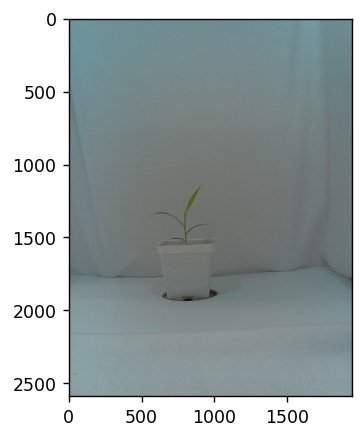

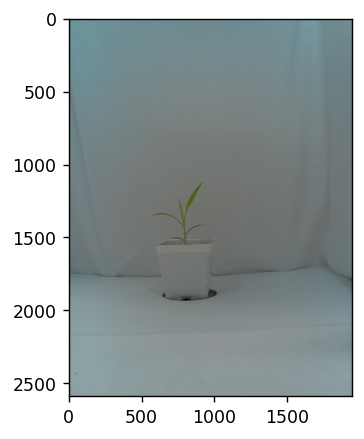

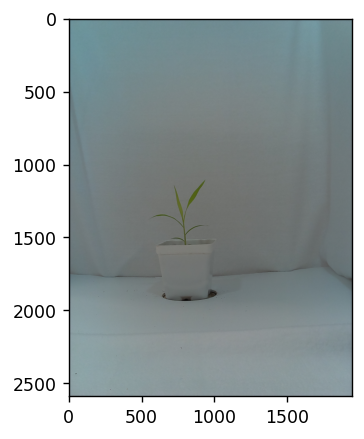

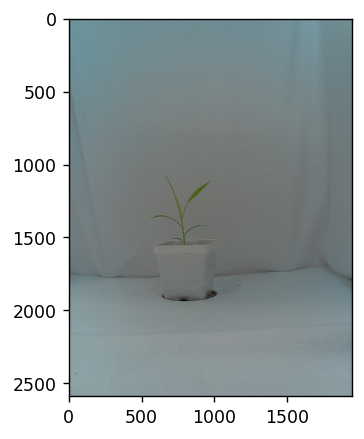

In [6]:
for day in days:
    img, imgpath, imgname = pcv.readimage(filename=os.path.join(path, f"{name_prefix}{day}.jpg"))

Notice in the script above that we have largely reused some code from our previous exercise, however, just to call attention to a concept we didn't discuss before notice how we can stitch together strings in Python using the 'f-string' syntax. With this method, strings, numbers, and other data types are automatically converted to strings in the final output. We're almost ready to iteratively run the acute workflow but before we do that we'll need to create an empty list (but we'll at least fill it with a header at least to start).


In [7]:
landmark_output=[['name', 'plm_x', 'plm_y', 'SS_x', 'SS_y', 'TS_x', 'TS_y', 'CC_ratio']]

As we iteratively run `acute` on each frame we'll end up storing the landmarks generated from that day within landmark output. Note that if we didn't have this on hand (or another comparable list) before we started our variables wouldn't have anywhere to go for us to successfully save them! Now let's repeat what we learned from the previous exercise at scale...


Contour volume: 2184.140382528305
Fusing contour edges
route C
Landmark site: 1841, Start site: 1819, Term. site: 21
Landmark point indices: [1841]
Starting site indices: [1819]
Termination site indices: [21]
route C
Landmark site: 308, Start site: 284, Term. site: 333
Landmark point indices: [1841, 308]
Starting site indices: [1819, 284]
Termination site indices: [21, 333]
route C
Landmark site: 553, Start site: 528, Term. site: 577
Landmark point indices: [1841, 308, 553]
Starting site indices: [1819, 284, 528]
Termination site indices: [21, 333, 577]
route C
Landmark site: 883, Start site: 869, Term. site: 894
Landmark point indices: [1841, 308, 553, 883]
Starting site indices: [1819, 284, 528, 869]
Termination site indices: [21, 333, 577, 894]
route C
Landmark site: 976, Start site: 948, Term. site: 1001
Landmark point indices: [1841, 308, 553, 883, 976]
Starting site indices: [1819, 284, 528, 869, 948]
Termination site indices: [21, 333, 577, 894, 1001]
route C
Landmark site: 1110

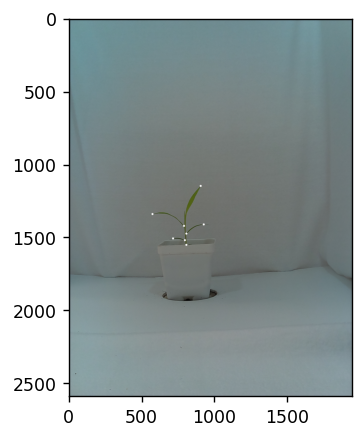

    landmark number: 8
Contour volume: 2436.750554203987
Fusing contour edges
route C
Landmark site: 2070, Start site: 2047, Term. site: 18
Landmark point indices: [2070]
Starting site indices: [2047]
Termination site indices: [18]
route C
Landmark site: 265, Start site: 241, Term. site: 289
Landmark point indices: [2070, 265]
Starting site indices: [2047, 241]
Termination site indices: [18, 289]
route C
Landmark site: 401, Start site: 377, Term. site: 428
Landmark point indices: [2070, 265, 401]
Starting site indices: [2047, 241, 377]
Termination site indices: [18, 289, 428]
route C
Landmark site: 598, Start site: 574, Term. site: 620
Landmark point indices: [2070, 265, 401, 598]
Starting site indices: [2047, 241, 377, 574]
Termination site indices: [18, 289, 428, 620]
route C
Landmark site: 839, Start site: 816, Term. site: 862
Landmark point indices: [2070, 265, 401, 598, 839]
Starting site indices: [2047, 241, 377, 574, 816]
Termination site indices: [18, 289, 428, 620, 862]
route 

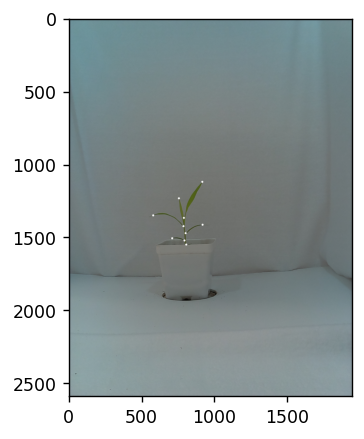

    landmark number: 10
Contour volume: 2664.7160643339157
Fusing contour edges
route C
Landmark site: 0, Start site: 2242, Term. site: 21
Landmark point indices: [0]
Starting site indices: [2242]
Termination site indices: [21]
route C
Landmark site: 280, Start site: 258, Term. site: 303
Landmark point indices: [0, 280]
Starting site indices: [2242, 258]
Termination site indices: [21, 303]
route C
Landmark site: 494, Start site: 472, Term. site: 519
Landmark point indices: [0, 280, 494]
Starting site indices: [2242, 258, 472]
Termination site indices: [21, 303, 519]
route C
Landmark site: 773, Start site: 750, Term. site: 799
Landmark point indices: [0, 280, 494, 773]
Starting site indices: [2242, 258, 472, 750]
Termination site indices: [21, 303, 519, 799]
route C
Landmark site: 1008, Start site: 988, Term. site: 1031
Landmark point indices: [0, 280, 494, 773, 1008]
Starting site indices: [2242, 258, 472, 750, 988]
Termination site indices: [21, 303, 519, 799, 1031]
route C
Landmark s

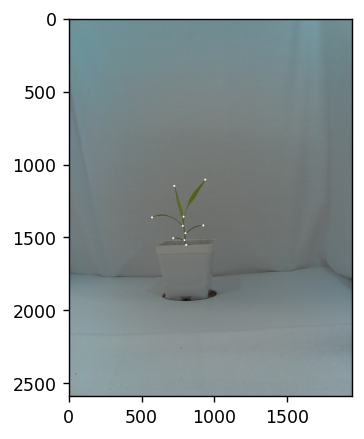

    landmark number: 10
Contour volume: 2932.647084593773
Fusing contour edges
route C
Landmark site: 0, Start site: 2442, Term. site: 22
Landmark point indices: [0]
Starting site indices: [2442]
Termination site indices: [22]
route C
Landmark site: 358, Start site: 333, Term. site: 386
Landmark point indices: [0, 358]
Starting site indices: [2442, 333]
Termination site indices: [22, 386]
route C
Landmark site: 595, Start site: 573, Term. site: 617
Landmark point indices: [0, 358, 595]
Starting site indices: [2442, 333, 573]
Termination site indices: [22, 386, 617]
route C
Landmark site: 926, Start site: 905, Term. site: 943
Landmark point indices: [0, 358, 595, 926]
Starting site indices: [2442, 333, 573, 905]
Termination site indices: [22, 386, 617, 943]
route C
Landmark site: 1004, Start site: 978, Term. site: 1027
Landmark point indices: [0, 358, 595, 926, 1004]
Starting site indices: [2442, 333, 573, 905, 978]
Termination site indices: [22, 386, 617, 943, 1027]
route C
Landmark si

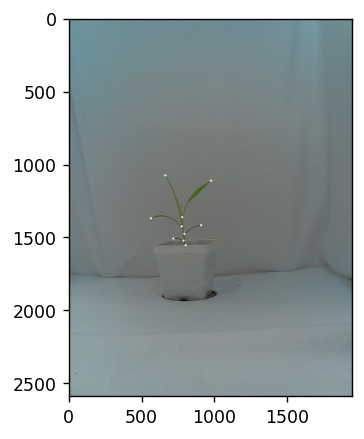

    landmark number: 10


In [8]:
for day in days:
    # Turn off debugging outputs for most steps to avoid a huge amount of output
    pcv.params.debug = None
    # 1. Reading our image into the environment
    img, imgpath, imgname = pcv.readimage(filename=os.path.join(path, f"{name_prefix}{day}.jpg"))
    
    # 2. Converting our RGB image into an Lab color space and extract the a and b channels
    img_a = pcv.rgb2gray_lab(rgb_img=img, channel="a")
    img_b = pcv.rgb2gray_lab(rgb_img=img, channel="b")
    
    # 3. Thresholding our a and b color channels to create two masks
    mask_a = pcv.threshold.binary(gray_img=img_a, threshold=123, max_value=255, object_type="dark")
    mask_b = pcv.threshold.binary(gray_img=img_b, threshold=133, max_value=255, object_type="light")
    
    # 4. Merging our individual a and b thresholded masks
    mask = pcv.logical_and(bin_img1=mask_a, bin_img2=mask_b)
    
    # 5. Extracting our contours from the final mask
    cnt, cnt_str = pcv.find_objects(img=img, mask=mask)
    
    # 6. Find largest contour of subject (outer boundary of subject)
    roi, roi_str = pcv.roi.rectangle(img=img, x=500, y=500, h=1100, w=800)
    kept_cnt, kept_str, kept_mask, kept_area = pcv.roi_objects(img=img, roi_contour=roi, roi_hierarchy=roi_str, 
                                                               object_contour=cnt, obj_hierarchy=cnt_str, roi_type="largest")
    
    # 7. Extracting pseudo-landmarks from the plant contours
    plt_img = np.copy(img)
    for cont in kept_cnt:
        if cv2.arcLength(cont, True) > 2*win:
            print(f'Contour volume: {cv2.arcLength(cont, True)}')
            # Turn debugging back on for acute
            pcv.params.debug = "plot"
            homolog_pts, homolog_start, homolog_stop, homolog_cc, chain, verbose = pcv.homology.acute(img=img, obj=cont, mask=mask,
                                                                                                      win=win, threshold=thresh)
            print(f'    landmark number: {len(homolog_pts)}')

            for h in range(0, len(homolog_pts)):
                landmark_output.append([name_prefix+str(day), homolog_pts[h][0][0], homolog_pts[h][0][1], homolog_start[h][0][0], 
                                        homolog_start[h][0][1], homolog_stop[h][0][0], homolog_stop[h][0][1], homolog_cc[h],])


In running the code block we should have recovered a comparable series of images with the pseudo-landmarks overlaid on top of them.  So how do our pseudo-landmarks look that we stored? Let's have a look!


In [9]:
landmark_output

[['name', 'plm_x', 'plm_y', 'SS_x', 'SS_y', 'TS_x', 'TS_y', 'CC_ratio'],
 ['B100_rep1_d10', 901, 1151, 892, 1173, 885, 1167, 255.0],
 ['B100_rep1_d10', 787, 1425, 789, 1401, 773, 1405, 6.219512195121951],
 ['B100_rep1_d10', 571, 1344, 594, 1338, 595, 1342, 255.0],
 ['B100_rep1_d10', 793, 1523, 796, 1511, 783, 1519, 18.88888888888889],
 ['B100_rep1_d10', 712, 1511, 736, 1508, 736, 1512, 255.0],
 ['B100_rep1_d10', 803, 1555, 795, 1533, 807, 1532, 255.0],
 ['B100_rep1_d10', 922, 1415, 898, 1420, 898, 1416, 255.0],
 ['B100_rep1_d10', 803, 1478, 816, 1459, 801, 1454, 12.207446808510639],
 ['B100_rep1_d11', 912, 1123, 904, 1146, 895, 1139, 255.0],
 ['B100_rep1_d11', 786, 1370, 794, 1347, 784, 1346, 0.0],
 ['B100_rep1_d11', 752, 1236, 761, 1258, 754, 1260, 255.0],
 ['B100_rep1_d11', 783, 1427, 781, 1403, 770, 1406, 32.69230769230769],
 ['B100_rep1_d11', 576, 1353, 598, 1342, 599, 1347, 255.0],
 ['B100_rep1_d11', 790, 1525, 791, 1509, 780, 1517, 23.448275862068964],
 ['B100_rep1_d11', 706, 151

This looks like it saved quite a bit more than an X-Y coordinates and a name for the file it came from...  We glossed over a few of the `acute` outputs in the previous exercise but it's probably worth sitting down and thinking about what they are now.  

If we look at the first 3 'columns' of this output we can see that there are names that correspond to our original files alongside a X-Y coordinate list which represents the plms we've been plotting.  So what these other SS and TS coordinates that we seem to be storing as well? Let's review a graph we've seen before in the previous exercise and then discuss...


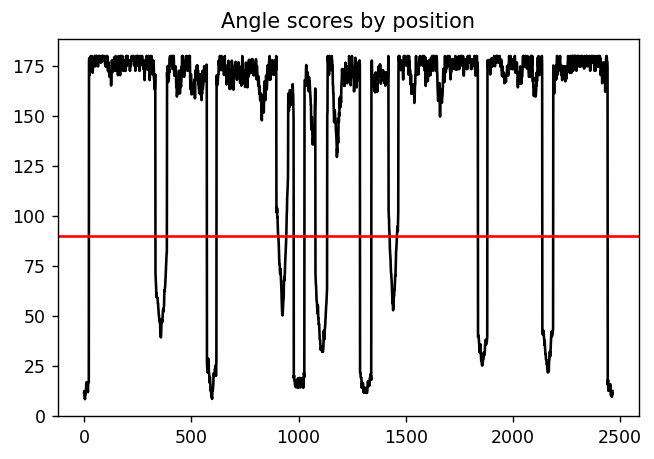

In [10]:
chain_pos=range(0, len(chain))

#Plot results
plt.figure()
fig1=plt.plot(chain_pos, chain, color='black')
fig1=plt.axhline(y=thresh, color='r', linestyle='-')
fig1=plt.title('Angle scores by position')
plt.show(fig1)

This is that waveform we've been introduced to before that defines our landmarks `acute` is generating.  Notice that as we walk along this contour there are clearly a consecutive span of points defining an acute 'region' rather than and clear point in space (hence why we have a little valley of low angles rather than an abrupt dip)? When a pseudo-landmark is defined the midpoint of each of these valleys is taken as THE 'pseudo-landmark' and the ends of either side of these acute regions is stored as well and defined as the 'acute region start site (SS)' and the 'acute region termination site (TS)' (yes, this terminology may have been appropriated from molecular biology).  So in fact we're actually storing a bit of extra spatial information than what is needed to plot as we generate our pseudo-landmarks.  

Now that we solved that mystery let's run 'landmark_output' and pick up where we left off...

In [11]:
landmark_output

[['name', 'plm_x', 'plm_y', 'SS_x', 'SS_y', 'TS_x', 'TS_y', 'CC_ratio'],
 ['B100_rep1_d10', 901, 1151, 892, 1173, 885, 1167, 255.0],
 ['B100_rep1_d10', 787, 1425, 789, 1401, 773, 1405, 6.219512195121951],
 ['B100_rep1_d10', 571, 1344, 594, 1338, 595, 1342, 255.0],
 ['B100_rep1_d10', 793, 1523, 796, 1511, 783, 1519, 18.88888888888889],
 ['B100_rep1_d10', 712, 1511, 736, 1508, 736, 1512, 255.0],
 ['B100_rep1_d10', 803, 1555, 795, 1533, 807, 1532, 255.0],
 ['B100_rep1_d10', 922, 1415, 898, 1420, 898, 1416, 255.0],
 ['B100_rep1_d10', 803, 1478, 816, 1459, 801, 1454, 12.207446808510639],
 ['B100_rep1_d11', 912, 1123, 904, 1146, 895, 1139, 255.0],
 ['B100_rep1_d11', 786, 1370, 794, 1347, 784, 1346, 0.0],
 ['B100_rep1_d11', 752, 1236, 761, 1258, 754, 1260, 255.0],
 ['B100_rep1_d11', 783, 1427, 781, 1403, 770, 1406, 32.69230769230769],
 ['B100_rep1_d11', 576, 1353, 598, 1342, 599, 1347, 255.0],
 ['B100_rep1_d11', 790, 1525, 791, 1509, 780, 1517, 23.448275862068964],
 ['B100_rep1_d11', 706, 151

At this point the first 7 'columns' we're looking at here should make some intuitive sense for what they are representing. However, we still have one last variable left we're storing which is unclear in its role.  This is a special variable we've created within `acute` using the volume generated between the plm, the SS, and the TS called the 'convexity-concavity ratio' or 'CC-ratio' for short.  What could this be used for? Let's take a look at our last mask again just to get a bit of context here.


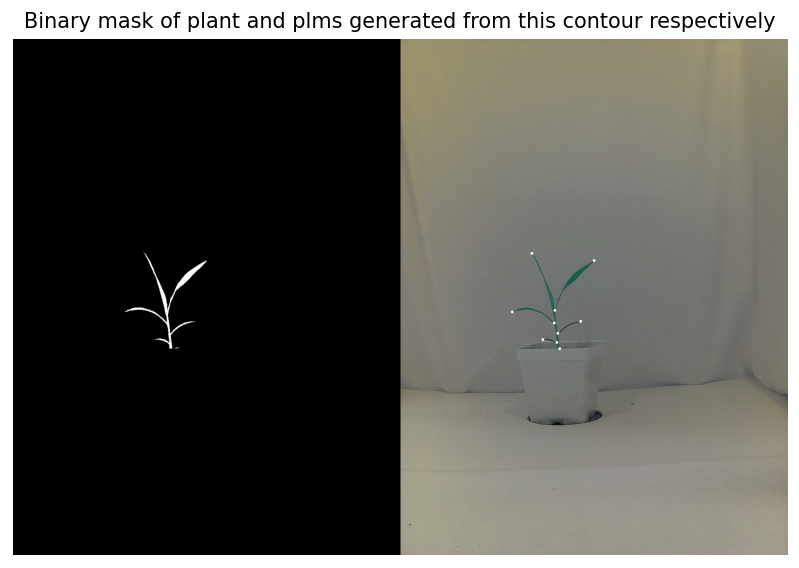

In [13]:
colorized_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
img_plms = np.copy(img)
cv2.drawContours(img_plms, homolog_pts, -1, (255, 255, 255), 14)
img_mask_plm = cv2.hconcat((colorized_mask, img_plms))

#Plot results
fig1=plt.figure(figsize=(8, 8))
fig1=plt.imshow(img_mask_plm, 'gray')
fig1=plt.xscale('linear')
fig1=plt.axis('off')
fig1=plt.title('Binary mask of plant and plms generated from this contour respectively')
plt.show(fig1)

As we look at our landmarks (white points) against our mask we used to generate them notice that we're retrieving both our leaf tips and our ligules (i.e. the joints where the leaves meet the 'stem')? Now remember that our 'CC-ratio' was computed using the volume of the space between our plm, SS, and TS? If we were to draw a triangle around a leaf tip and a ligule it seems like the average pixel color could differ pretty drastically right? If we go back up and look at our CC-ratio's we'll notice that they range between 0 and 255 (the range of standard pixel intensities) with each one representing an average pixel intensity of all pixels internal to this volume we've specified.  Thus, we could expect values closer to black (0) to be more common in our ligules and values closer to white (255) to be more common in our leaf tips.  Thus we can use this range as a score to specify convex regions of the contour as being closer to 255 and concave regions of the contour to be closer to 0.  Although it seems like we just did a bunch of extra work for no reason in generating this meta-data we'll get to see why this strategy was so important within our third exercise to learn the general operations of `acute`.
